# Introduction
### Problem Statement
Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster. Take this example:

The author explicitly uses the word “ABLAZE” but means it metaphorically. This is clear to a human right away, especially with the visual aid. But it’s less clear to a machine.

In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified. If this is your first time working on an NLP problem, we've created a quick tutorial to get you up and running.

In [1]:
# We would be solving this problem using deep learning keras API which can also work on NLP
# Importing the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
# Natural Language Tool Kit 
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from collections import Counter
import cufflinks as cf
cf.go_offline()
import re
# Tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/abhilash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Importing the dataset
df=pd.read_csv('train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
# Exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
# By calling the infor function we can see that the dataset has 4 features and a target
# id : Gives the unique id of the tweet. No empty values
# keyword : Gives a keyword in the text. Helps in classifying the tweets. Some empty columns
# location: Place from where the tweets were made. Very large number of empty sets
# text: Tweet
# target: Whether it is a disaster tweet or not 1: Disaster, 0: Non disaster

In [5]:
df_test=pd.read_csv('test.csv')

In [6]:
# We must first drop id,keyword and location from the dataset and then try to build overit
df.drop(['id','keyword','location'],inplace=True,axis=1)
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
# Getting useful info out of df_test
id=df_test['id']

In [8]:
# Shuffling the training set
df=df.sample(frac=1).reset_index(drop=True)

In [9]:
# Dividing the set into variable and target
Y_train=df['target'].values

In [10]:
df

,text,target
0,@reriellechan HE WAS THE LICH KING'S FIRST CAS...,1
1,It was past curfew\nand we were at the Grove,0
2,'Amateur Night' Actress Reprises Role for 'Sir...,1
3,If I survive I'll see you tomorrow,0
4,I liked a @YouTube video http://t.co/V57NUgmGK...,1
...,...,...
7608,Finnish ministers: Fennovoima nuclear reactor ...,0
7609,Myanmar Flooding: Heavy monsoon rains during t...,1
7610,Tension In Bayelsa As Patience Jonathan Plans ...,1
7611,CA Cops: Illegal Immigrant with 4 Prior Arrest...,1


In [11]:
#How many http words has this text?
df.loc[df['text'].str.contains('http')].target.value_counts()

1    2172
0    1799
Name: target, dtype: int64

In [12]:
pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

def remove_html(text):
    no_html= pattern.sub('',text)
    return no_html

In [13]:

# Remove all text that start with html
df['text']=df['text'].apply(lambda x : remove_html(x))
df_test['text']=df['text'].apply(lambda x: remove_html(x))


In [14]:
# Now remove stopwords, pass to lower add delimiter and more
def clean_text(text):
 
    text = re.sub('[^a-zA-Z]', ' ', text)  

    text = text.lower()  

    # split to array(default delimiter is " ") 
    text = text.split()  
    
    text = [w for w in text if not w in set(stopwords.words('english'))] 

    text = ' '.join(text)    
            
    return text


In [15]:
# Apply clean text 
df['text'] = df['text'].apply(lambda x : clean_text(x))
df_test['text']=df_test['text'].apply(lambda x: clean_text(x))


In [16]:
# Dividing the training set into a training and a validation set 
df_train,df_val,Y_train,Y_val=train_test_split(df['text'],Y_train,test_size=0.1)
df_test.drop(['id','keyword','location'],inplace=True,axis=1)
df_test=df_test['text'].values

In [17]:
print('df_train Shape: ' ,df_train.shape)
print('df_val Shape: ' ,df_val.shape)
print('df_test Shape: ' ,df_test.shape)
print('Y_train Shape: ' ,Y_train.shape)
print('Y_val Shape: ' ,Y_val.shape)

df_train Shape:  (6851,)
df_val Shape:  (762,)
df_test Shape:  (3263,)
Y_train Shape:  (6851,)
Y_val Shape:  (762,)


In [18]:
# Convert sentences to sequences
MAX_VOCAB_SIZE=200000
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train=tokenizer.texts_to_sequences(df_train)
sequences_val=tokenizer.texts_to_sequences(df_val)
sequneces_test=tokenizer.texts_to_sequences(df_test)

In [19]:
# Get Word - Integer Mapping
word2idx=tokenizer.word_index
V=len(word2idx)
print('Found %s number of unique tokens' %V)

Found 15072 number of unique tokens


In [20]:
# Pad Sequences so that we get a N X T matrix
data_train=pad_sequences(sequences_train)
print('Shape of the data_train tensor: ', data_train.shape)

# get sequence length
T=data_train.shape[1]
print('The length of the sequence is: ',T)

Shape of the data_train tensor:  (6851, 25)
The length of the sequence is:  25


In [21]:
data_val=pad_sequences(sequences_val,maxlen=T)
print('Shape of the data_val tensor: ', data_val.shape)

Shape of the data_val tensor:  (762, 25)


In [22]:
data_test=pad_sequences(sequneces_test,maxlen=T)
print('Shape of the data_test tensor: ', data_test.shape)

Shape of the data_test tensor:  (3263, 25)


In [23]:
# Defining the model 
# We get to choose the Embedding Dimensionality
D=20
# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(512, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(1024, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)


model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 25, 20)            301460    
_________________________________________________________________
conv1d (Conv1D)              (None, 23, 512)           31232     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 7, 512)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 1024)           1573888   
_________________________________________________________________
global_max_pooling1d (Global (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                

In [24]:
# Compiling the code
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
r=model.fit(data_train,Y_train,validation_data=(data_val,Y_val),epochs=5)

Epoch 1/5
215/215 [==============================] - 53s 247ms/step - loss: 0.5804 - accuracy: 0.6866 - val_loss: 0.4681 - val_accuracy: 0.7887
Epoch 2/5
215/215 [==============================] - 77s 360ms/step - loss: 0.3224 - accuracy: 0.8664 - val_loss: 0.5002 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 67s 313ms/step - loss: 0.1729 - accuracy: 0.9385 - val_loss: 0.6295 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 59s 275ms/step - loss: 0.1053 - accuracy: 0.9628 - val_loss: 0.7256 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 67s 313ms/step - loss: 0.0777 - accuracy: 0.9718 - val_loss: 0.8287 - val_accuracy: 0.7651


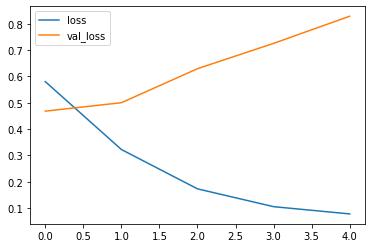

In [25]:
# Plotting the Accuracy and the Loss
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

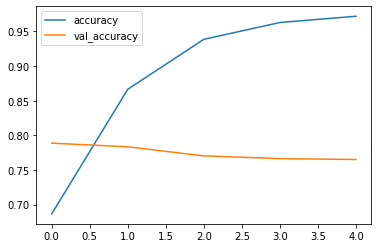

In [26]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [27]:
predictions_val=model.predict(data_val).flatten()
Y_pred_val=[]
for i in predictions_val:
  if i<=0.5:
    Y_pred_val.append(0)
  else:
    Y_pred_val.append(1)

from sklearn.metrics import confusion_matrix,f1_score
cm=confusion_matrix(Y_val,Y_pred_val)
f1=f1_score(Y_val,Y_pred_val)
print(f1)

0.7371512481644641


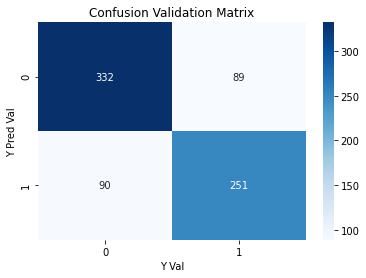

In [28]:
ax=sns.heatmap(cm,annot=True,fmt='',cmap='Blues')
ax.set_xlabel('Y Val')
ax.set_ylabel('Y Pred Val')
ax.set_title('Confusion Validation Matrix');

In [29]:
predictions=model.predict(data_test).flatten()
Y_pred=[]
for i in predictions:
  if i<=0.5:
    Y_pred.append(0)
  else:
    Y_pred.append(1)

In [30]:
submission=pd.DataFrame(id,columns=['id'])
submission['target']=Y_pred
submission.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1


In [31]:
submission.to_csv('submission.csv',index=False)